<a href="https://colab.research.google.com/github/Collokd/Core_Week_7_Independent_Project/blob/master/Week_7_Independent_Project_Collins_Kemboi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - IP Week 7

## 1. Defining the Question

### a) Specifying the Question

The main objective of this project is to determine factors affecting prices of houses and developing a model to effectively predict the sale prices.

### b) Defining the Metric for Success
1. Determining MAIN factors affecting price of houses.
2. Accuratly developing a model that can predict the value of houses.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Dataset and necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

url = "http://bit.ly/IndependentProjectWeek7Dataset"

data = pd.read_csv(url)

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
#

data.shape

(21613, 20)

In [3]:
# Previewing our dataset
#
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Previewing the first 10 rows

data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
# Previewing the bottom 10 rows

data.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has an appropriate datatype
#

data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [7]:
# Previewing columns on our dataset
#
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

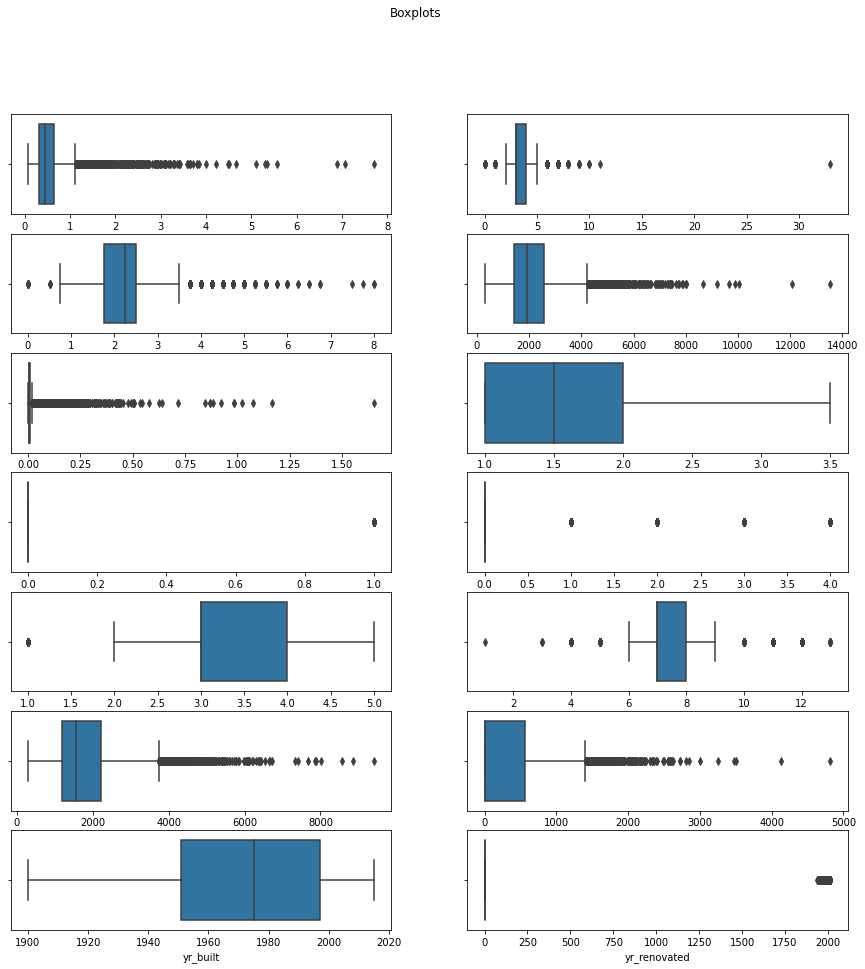

In [8]:
# Checking for Outliers
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(data['price'], ax=ax1)
sns.boxplot(data['bedrooms'], ax=ax2)
sns.boxplot(data['bathrooms'], ax=ax3)
sns.boxplot(data['sqft_living'], ax=ax4)
sns.boxplot(data['sqft_lot'], ax=ax5)
sns.boxplot(data['floors'], ax=ax6)
sns.boxplot(data['waterfront'], ax=ax7)
sns.boxplot(data['view'], ax=ax8)
sns.boxplot(data['condition'], ax=ax9)
sns.boxplot(data['grade'], ax=ax10)
sns.boxplot(data['sqft_above'], ax=ax11)
sns.boxplot(data['sqft_basement'], ax=ax12)
sns.boxplot(data['yr_built'], ax=ax13)
sns.boxplot(data['yr_renovated'], ax=ax14)
plt.show()

In [10]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [11]:
# Identifying Outliers on our dataset using Z-test
#
numeric = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)


[[0.88614631 0.86641874 0.39873715 ... 0.21012839 0.9433552  0.26071541]
 [0.63751062 0.00594021 0.39873715 ... 4.7466776  0.43268619 0.18786773]
 [0.36544385 0.98047774 1.47395936 ... 0.21012839 1.07013975 0.17237524]
 ...
 [1.06275071 0.37588065 1.47395936 ... 0.21012839 1.41025258 0.39414129]
 [1.49104567 0.38159993 0.39873715 ... 0.21012839 0.8412214  0.42051149]
 [1.0627507  0.58576282 1.47395936 ... 0.21012839 1.41025258 0.41794772]]


In [12]:
# Dropping outliers identified
new_df= numeric[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 21613
New dataframe size: 18898


In [15]:
# Checking total missing data from our combined datafram
#

new_df.isnull().sum()



id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# There are no missing values from our dataset

In [16]:

# checking for duplicates

new_df.duplicated()

# there are no duplicates

0        False
2        False
3        False
4        False
6        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 18898, dtype: bool

In [0]:
# Saving our clean data
#
new_df.to_csv("clean.csv")

## 6. Exploratory Analysis

> ## i) Univariate Analysis

In [19]:
# Loading our dataset and creating a dataframe.
# previewing our column names.
#
# ----
#
df = pd.read_csv("clean.csv")
df.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
# Recap of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18898 non-null  int64  
 1   id             18898 non-null  int64  
 2   price          18898 non-null  float64
 3   bedrooms       18898 non-null  int64  
 4   bathrooms      18898 non-null  float64
 5   sqft_living    18898 non-null  int64  
 6   sqft_lot       18898 non-null  int64  
 7   floors         18898 non-null  float64
 8   waterfront     18898 non-null  int64  
 9   view           18898 non-null  int64  
 10  condition      18898 non-null  int64  
 11  grade          18898 non-null  int64  
 12  sqft_above     18898 non-null  int64  
 13  sqft_basement  18898 non-null  int64  
 14  yr_built       18898 non-null  int64  
 15  yr_renovated   18898 non-null  int64  
 16  sqft_living15  18898 non-null  int64  
 17  sqft_lot15     18898 non-null  int64  
dtypes: flo

In [21]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,18898.000000,1.889800e+04,1.889800e+04,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.0,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.0,18898.000000,18898.000000
mean,10834.634988,4.653922e+09,4.798770e+05,3.321357,2.037173,1947.473754,9913.977617,1.481136,0.0,0.091385,3.420203,7.533601,1694.087893,253.385861,1971.943274,0.0,1908.618161,9152.630807
std,6248.277409,2.873835e+09,2.307993e+05,0.846579,0.686955,737.345169,11569.681342,0.539567,0.0,0.400506,0.646825,1.024626,707.362051,386.331351,28.913704,0.0,598.634788,9092.587596
min,0.000000,1.000102e+06,8.200000e+04,1.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,0.0,460.000000,651.000000
25%,5442.250000,2.204500e+09,3.110000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,1953.000000,0.0,1460.000000,5000.000000
50%,10795.500000,4.015600e+09,4.300000e+05,3.000000,2.000000,1840.000000,7392.000000,1.000000,0.0,0.000000,3.000000,7.000000,1500.000000,0.000000,1976.000000,0.0,1790.000000,7471.000000
75%,16261.750000,7.399300e+09,5.950000e+05,4.000000,2.500000,2400.000000,9938.000000,2.000000,0.0,0.000000,4.000000,8.000000,2100.000000,500.000000,1997.000000,0.0,2260.000000,9617.750000
max,21612.000000,9.900000e+09,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1610.000000,2015.000000,0.0,4040.000000,93825.000000


In [22]:
# Dropping unnecessary columns
df1 = df.drop(['Unnamed: 0','id'], axis = 1)
df1.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18898 non-null  float64
 1   bedrooms       18898 non-null  int64  
 2   bathrooms      18898 non-null  float64
 3   sqft_living    18898 non-null  int64  
 4   sqft_lot       18898 non-null  int64  
 5   floors         18898 non-null  float64
 6   waterfront     18898 non-null  int64  
 7   view           18898 non-null  int64  
 8   condition      18898 non-null  int64  
 9   grade          18898 non-null  int64  
 10  sqft_above     18898 non-null  int64  
 11  sqft_basement  18898 non-null  int64  
 12  yr_built       18898 non-null  int64  
 13  yr_renovated   18898 non-null  int64  
 14  sqft_living15  18898 non-null  int64  
 15  sqft_lot15     18898 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.3 MB


In [24]:
df1.nunique()

price            3328
bedrooms            6
bathrooms          17
sqft_living       790
sqft_lot         8563
floors              5
waterfront          1
view                3
condition           4
grade               7
sqft_above        751
sqft_basement     206
yr_built          116
yr_renovated        1
sqft_living15     650
sqft_lot15       7571
dtype: int64

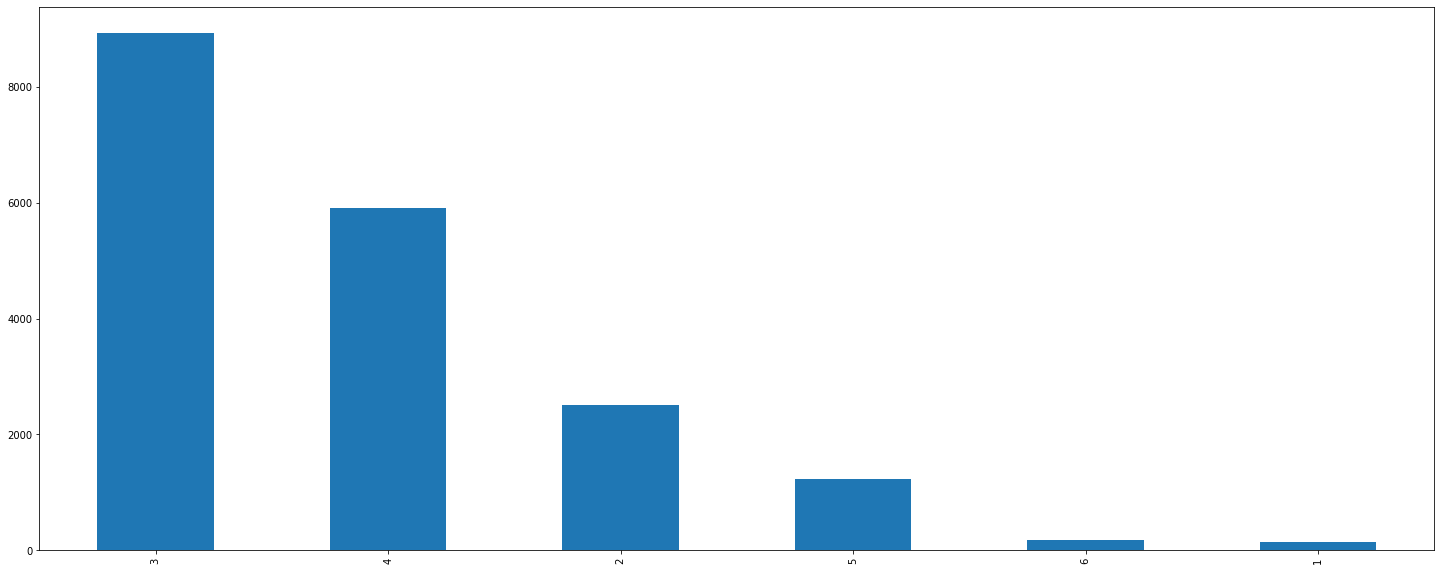

In [25]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['bedrooms'].value_counts().plot.bar()

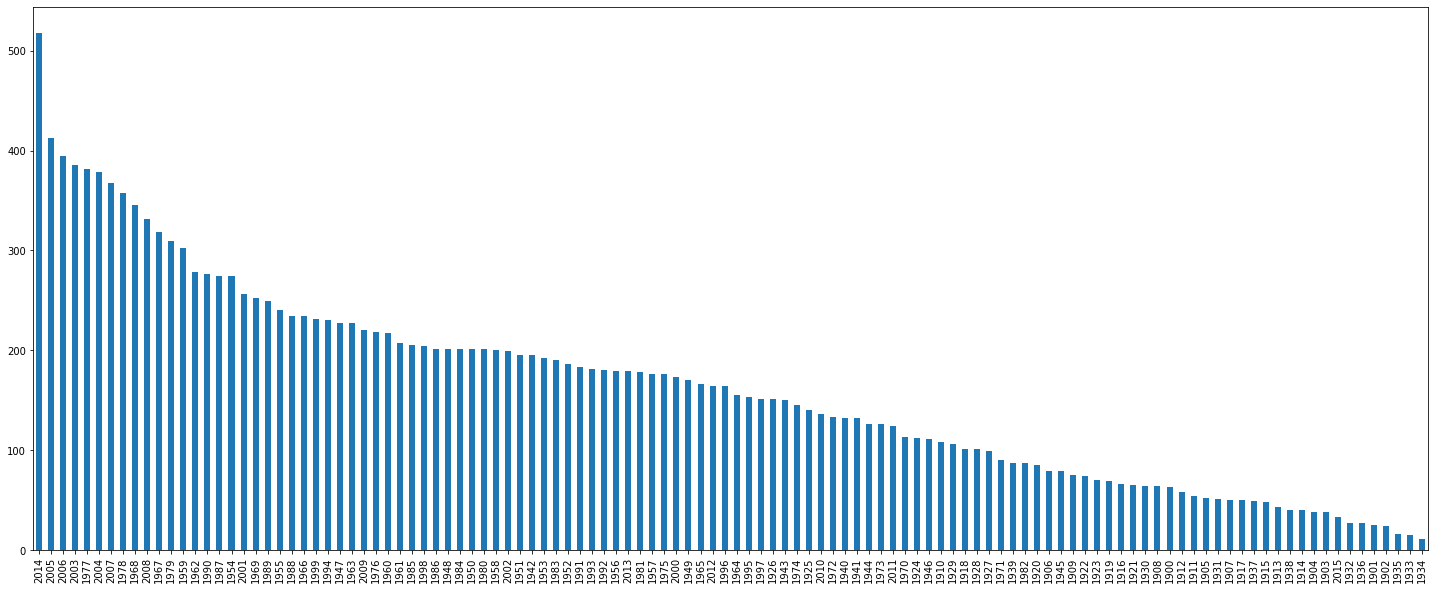

In [27]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['yr_built'].value_counts().plot.bar()

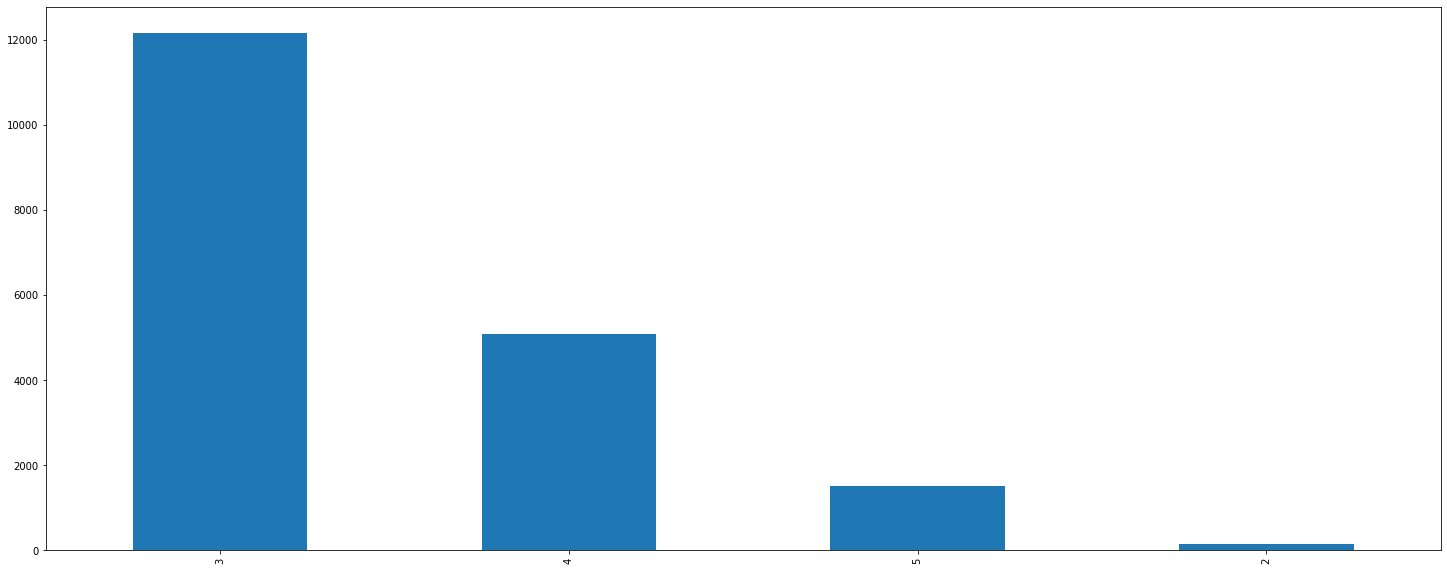

In [28]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['condition'].value_counts().plot.bar()

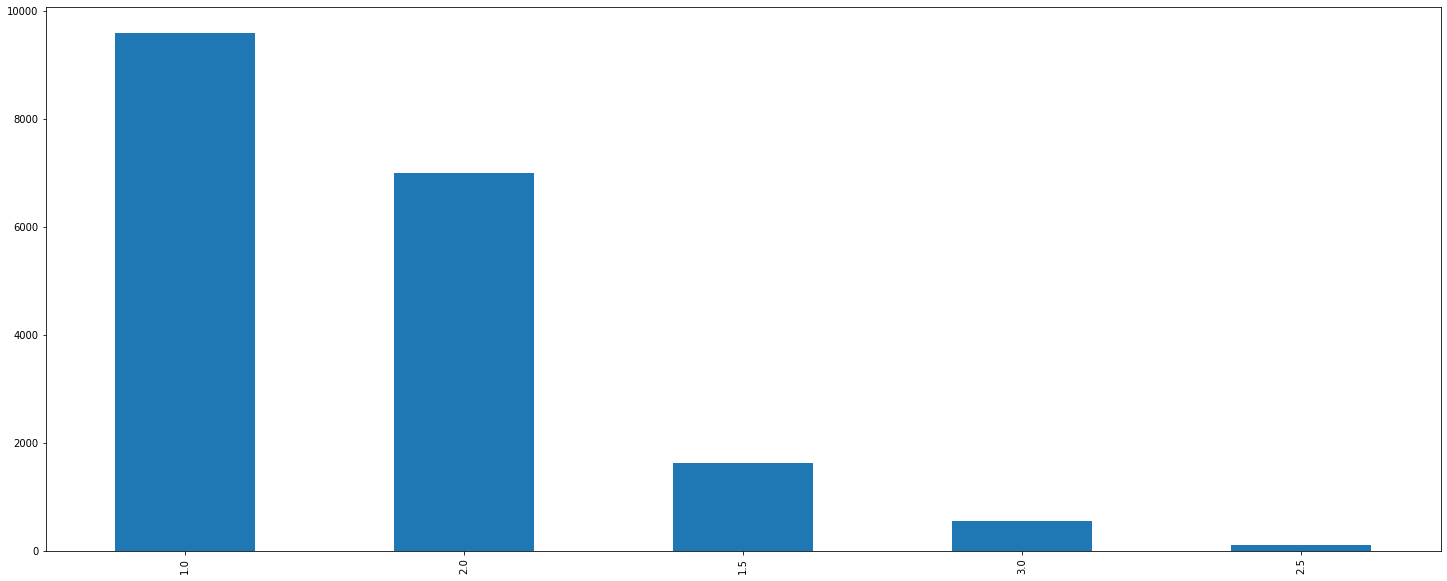

In [29]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['floors'].value_counts().plot.bar()

> ## ii) Bivariate Analysis


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18898 non-null  float64
 1   bedrooms       18898 non-null  int64  
 2   bathrooms      18898 non-null  float64
 3   sqft_living    18898 non-null  int64  
 4   sqft_lot       18898 non-null  int64  
 5   floors         18898 non-null  float64
 6   waterfront     18898 non-null  int64  
 7   view           18898 non-null  int64  
 8   condition      18898 non-null  int64  
 9   grade          18898 non-null  int64  
 10  sqft_above     18898 non-null  int64  
 11  sqft_basement  18898 non-null  int64  
 12  yr_built       18898 non-null  int64  
 13  yr_renovated   18898 non-null  int64  
 14  sqft_living15  18898 non-null  int64  
 15  sqft_lot15     18898 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.3 MB


In [0]:
numerical = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']]

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

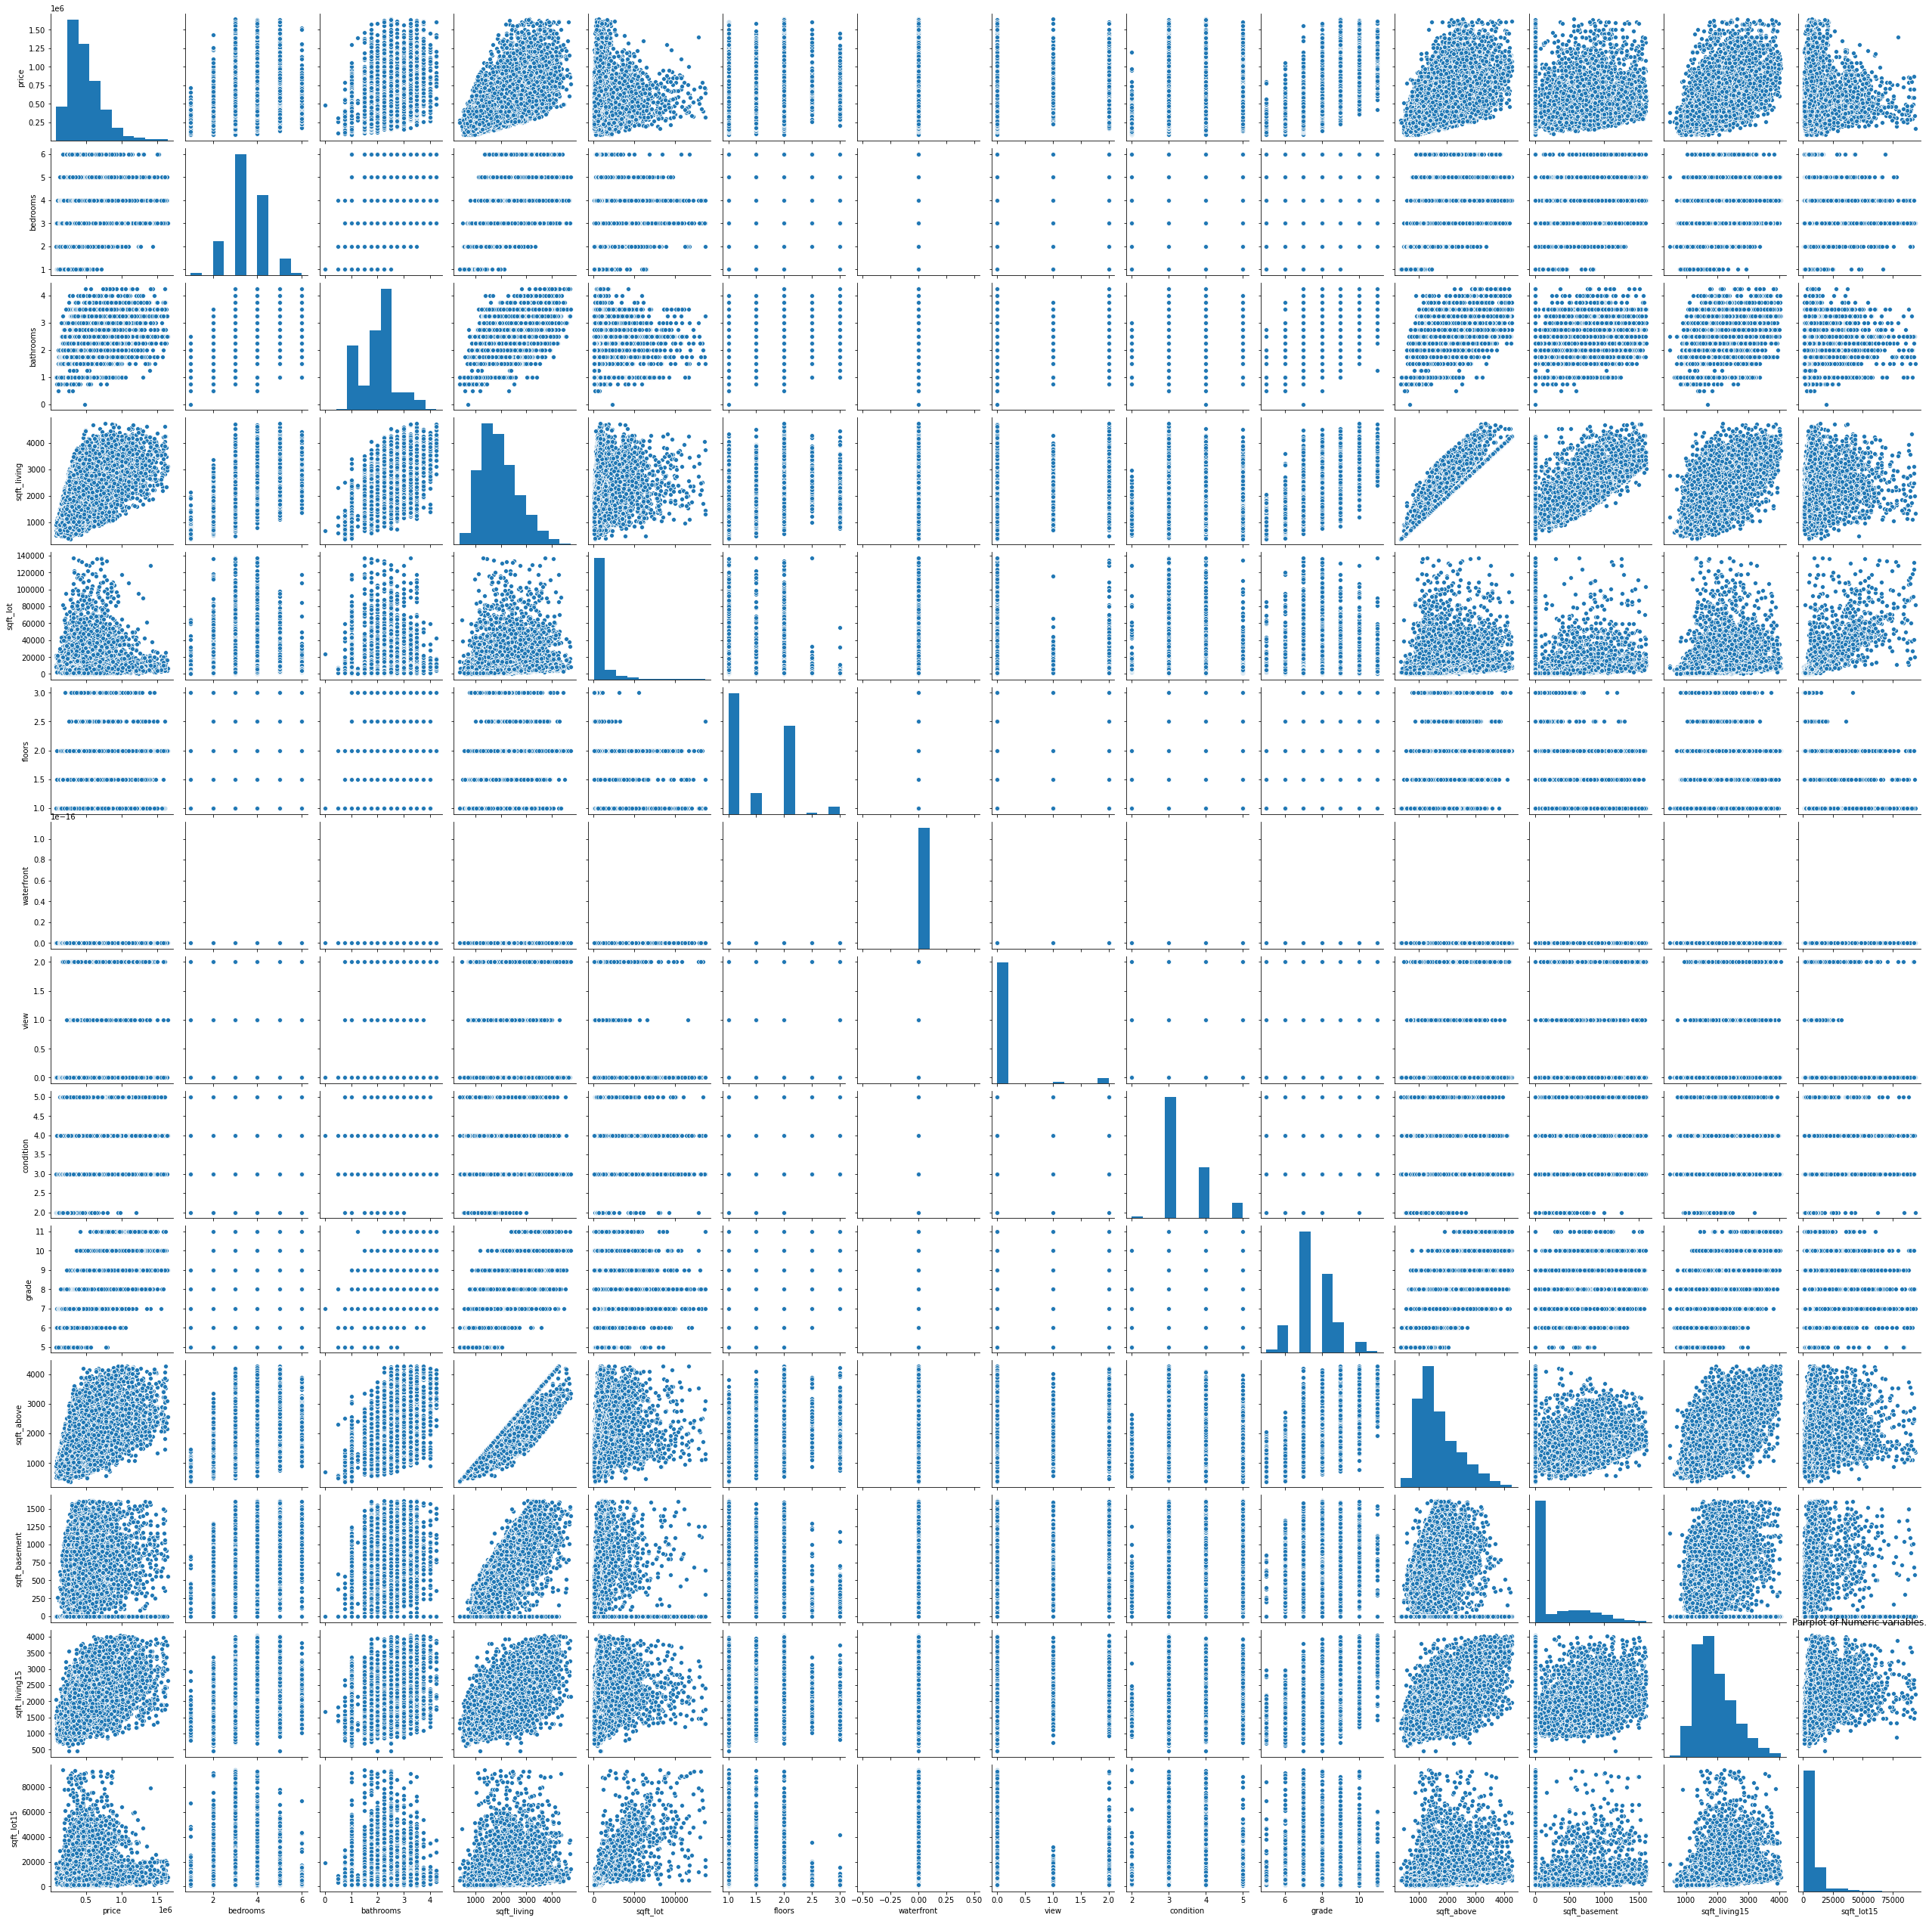

In [32]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(numerical)
plt.title("Pairplot of Numeric variables.")

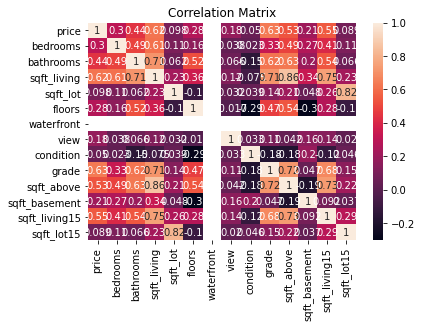

In [35]:
# Plotting heatmap to show how our numeric variables correlate
sns.heatmap(numerical.corr(),annot=True,)
plt.title('Correlation Matrix')
plt.show()

> ## iii) Multivariate Analysis

# Polynomial Regression

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
combined["home_team_code"] = lb_make.fit_transform(combined["home_team"])
combined[["home_team", "home_team_code"]].head()

,home_team,home_team_code
0,Bolivia,24
1,Brazil,27
2,Ecuador,52
3,Guinea,73
4,Paraguay,138


In [0]:
lb_make = LabelEncoder()
combined["away_team_code"] = lb_make.fit_transform(combined["away_team"])
combined[["away_team", "away_team_code"]].head()

,away_team,away_team_code
0,Uruguay,191
1,Mexico,110
2,Venezuela,194
3,Sierra Leone,159
4,Argentina,8


In [0]:
lb_make = LabelEncoder()
combined["tournament_code"] = lb_make.fit_transform(combined["tournament"])
combined[["tournament", "tournament_code"]].head()

,tournament,tournament_code
0,FIFA World Cup qualification,17
1,Friendly,18
2,FIFA World Cup qualification,17
3,Friendly,18
4,FIFA World Cup qualification,17


## Home Team

In [0]:
# Importing necessary libraries for polynomial regression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [0]:
combined.head(5)

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,country,home_team_code,away_team_code,tournament_code
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,24,191,17
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly,Brazil,27,110,18
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,52,194,17
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guinea,Sierra Leone,1,0,Friendly,Guinea,73,159,18
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,138,8,17


In [0]:
# Split the data into features and labels
X = combined.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined['home_score']

In [0]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
# Fit the Independet Variables to a Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [0]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

In [0]:
# We get the predictions as an array
poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_predic )

[0.80208219 1.86967992 0.91601688 ... 0.70010008 1.02778152 0.94574032]


In [0]:
from sklearn import metrics

poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_predic))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_predic))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_predic))) 

Mean Absolute Error: 0.8692866401959033
Mean Squared Error: 1.5003129912295907
Root Mean Squared Error: 1.2248726428611223


We get a RMSE of 1.22 showing that our module is quite efficient for our prediction.

## Away team

In [0]:
# We are going to plot the relationship between away team scores and other columns
# Split the data into features and labels
X = combined.drop(["away_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined['away_score']

In [0]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
# Fit the Independet Variables to a Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [0]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# We get the predictions as an array
poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_pred )

[0.80208219 1.86967992 0.91601688 ... 0.70010008 1.02778152 0.94574032]


In [0]:
from sklearn import metrics

poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred))) 

Mean Absolute Error: 0.8692866401959033
Mean Squared Error: 1.5003129912295907
Root Mean Squared Error: 1.2248726428611223


We get a RMSE of 1.22 showing that our module is quite efficient for our prediction.

# Logistic Regression



## Home Team

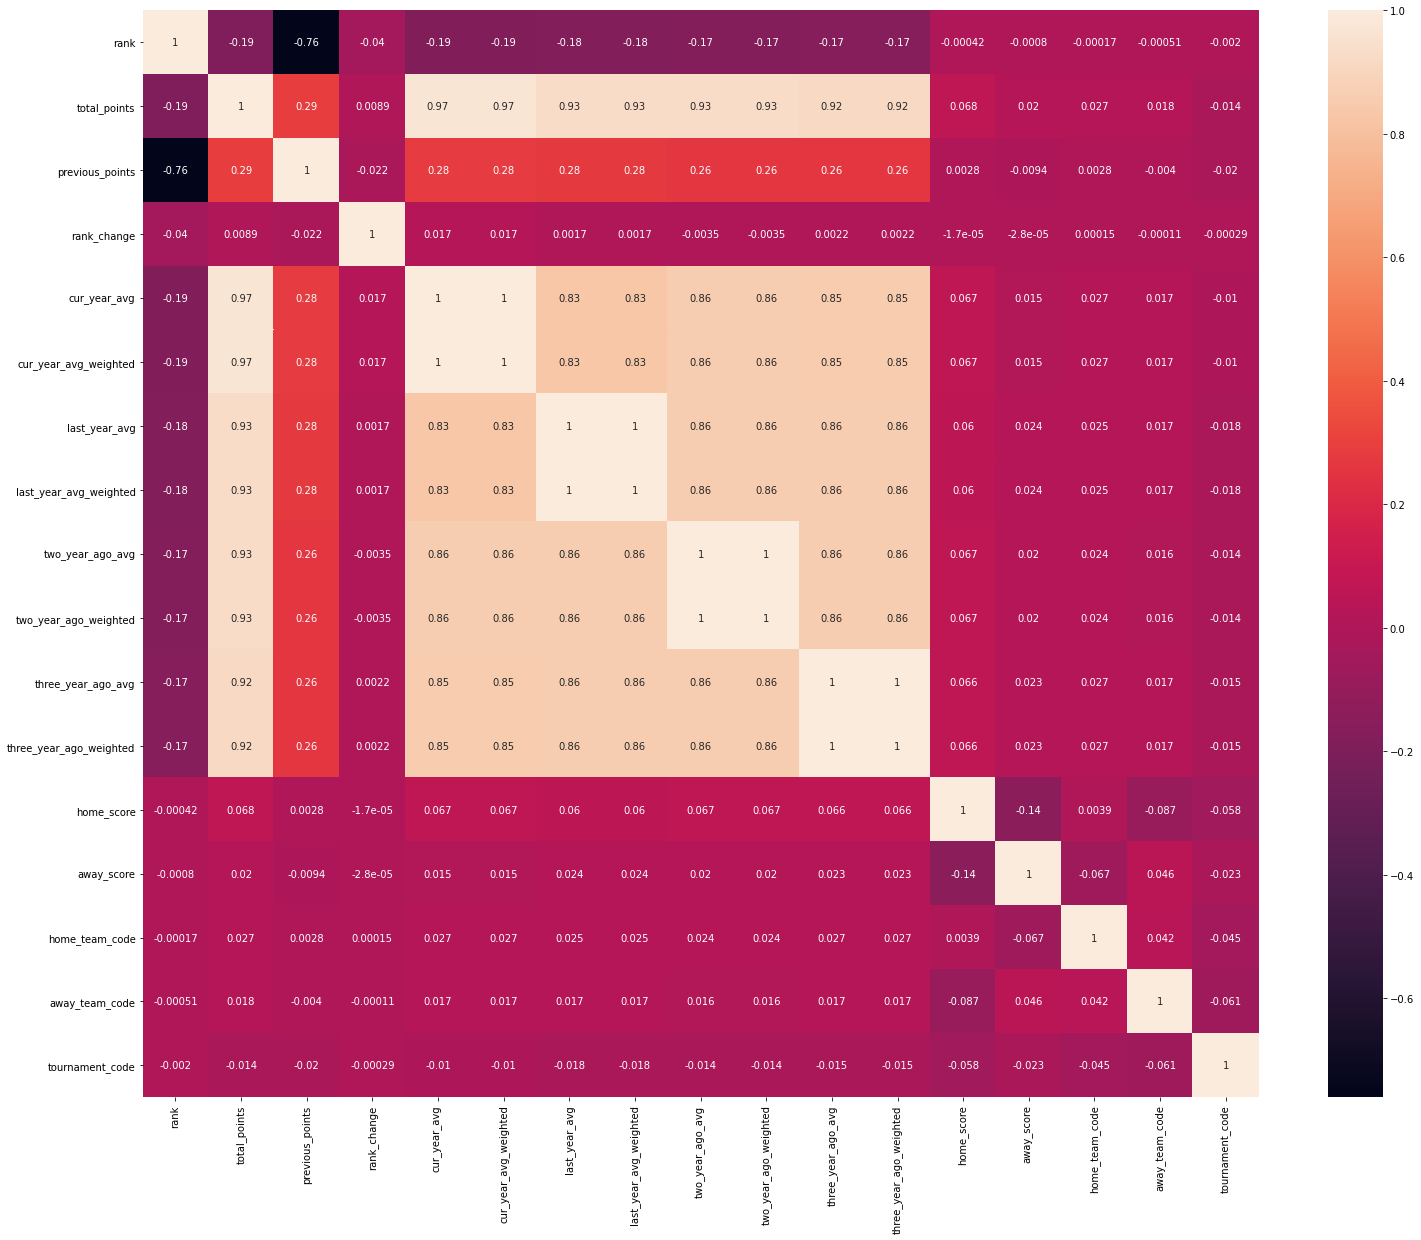

In [0]:
# Plotting a heatmap to determine how independent the variables are

plt.figure(figsize=(25,20))

sns.heatmap(combined.corr(),annot=True)

In [0]:
# Splitting our dataset
#
X = combined.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

We drop all the columns we will not need for our analysis, the we split the rmaining data into training and test sets

In [0]:
X.head()

,rank,country_full,away_score,country,home_team_code,away_team_code,tournament_code
0,1,Germany,1,Bolivia,24,191,17
1,1,Germany,1,Brazil,27,110,18
2,1,Germany,0,Ecuador,52,194,17
3,1,Germany,0,Guinea,73,159,18
4,1,Germany,3,Paraguay,138,8,17


In [0]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[3912,    0, 4852,    0,    0,    0,    0,  927,    0,  655,   76,
        3085,    3,    0, 2970],
       [3561,    0, 6587,    0,    0,    0,    0,  948,    0,  399,  251,
        2901,    0,    0, 4218],
       [2086,    0, 4850,    4,    0,    0,    0,  828,    0,  480,  107,
        2847,    1,    0, 3612],
       [1149,    0, 2411,    0,    0,    0,    0,  363,    0,  412,   81,
        1042,    0,    0, 1635],
       [ 426,    0,  833,    0,    0,    0,    0,  249,    0,  170,   40,
         333,    0,    0,  611],
       [ 152,    0,  497,    0,    0,    0,    0,    0,    0,  173,   30,
         490,    0,    0,  420],
       [ 126,    0,  127,    0,    0,    0,    8,  115,    0,   59,   16,
         139,    0,    0,  171],
       [   0,    0,   69,    0,    0,    0,    0,   89,    0,   35,    0,
          78,    0,    0,  172],
       [  60,    0,  168,    0,    0,    0,    0,    0,    0,    0,    0,
          68,    0,    0,    0],
       [   0,    0,    0,    0,    0,

In [0]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 9.254659357870008
Mean Squared Error: 208.65954581049334
Root Mean Squared Error: 14.445052641319565


From the RMSE results, our accuracy is at about 14%

In [0]:
# Getting the predicted home scores

y_pred = LogReg.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [0]:
# Use score method to get accuracy of model
score = LogReg.score(X_test, y_test)
print(score)

# Accuracy is at 14%

0.14288175411119813


#### Our logistic Regression model yields an accuracy of 14% which is very low



```
# This is formatted as code
```

## Away team

In [0]:
# In this case our dependent variable will be the away score
# Splitting our dataset
#
x = combined.drop(['away_score',"home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
Y = combined["away_score"]

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = .3, random_state=25)

In [0]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
Y_pred = LogReg.predict(x_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[18926,  6416,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [15150,  6285,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 6814,  3784,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 2769,  1362,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  939,   399,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  174,   170,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  139,    69,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   62,    62,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   66,    63,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,   130,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   60,    11,     0,     0,     0,     0,     0,    

In [0]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 0.9607987470634299
Mean Squared Error: 2.2906969459671105
Root Mean Squared Error: 1.5135048549532673


In [0]:
# Getting the predicted home scores

Y_pred = LogReg.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})

comparison_frame.describe()

In [0]:
# Use score method to get accuracy of model
score = LogReg.score(x_test, Y_test)
print(score)

0.39484729835552074


#### Our logistic regression model is yielding an accuracy of 39%

# Hyperparameter Tuning

### GridSearchCV

In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# predicting the test set results

y_predicted = classifier.predict(X_test)

In [0]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predicted)

In [0]:
# to check for the accuracy of our score

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, y_predicted)

accuracy

# The accuracy is at 30% without using the appropiate hyperparameters

0.29895066562255285

### Applying the GridSearchCV to find the best model and the best parameters


In [0]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C' : [1,5,20,100,1000], 'kernel' : ['linear']},
              {'C' : [1,5,20,100,1000], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)             

In [0]:
# Getting the grid search best score to get the accuracy

accuracy = grid_search.best_score_

accuracy

This gives us the accuracy of the model when we use the appropriate parameters.

In [0]:
# Getting the best parameters

grid_search.best_params_

The above are the ideal parameters which we need to use to get a higher accuracy.